# <font color='blue'> Import Libraries</font>


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import nltk as nltk
import re
import string as str
from nltk.tokenize import word_tokenize
import nltk.data
import csv
import pickle
import warnings
warnings.simplefilter("ignore")
import codecs
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score, recall_score, accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

# <font color='blue'>  Reading Data </font>


In [2]:
# Loading the dataset
data=pd.read_csv("Language Detection.csv") 

In [3]:
#This line sets an option in pandas to display columns with a maximum width of 200 characters.
#This means that if any column has a longer value, it will be truncated to 200 characters.
pd.set_option('display.max_colwidth',200)

#This line displays the first 10337 rows of the "data".
data.head(10337)

,Text,Language
0,"Nature, in the broadest sense, is the natural, physical, material world or universe.",English
1,"""Nature"" can refer to the phenomena of the physical world, and also to life in general.",English
2,"The study of nature is a large, if not the only, part of science.",English
3,"Although humans are part of nature, human activity is often understood as a separate category from other natural phenomena.",English
4,"[1] The word nature is borrowed from the Old French nature and is derived from the Latin word natura, or ""essential qualities, innate disposition"", and in ancient times, literally meant ""birth"".",English
...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒಳ್ಳೆಯದನ್ನು ನೀಡೋಣ.,Kannada
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್ನು ಬದಲಾಯಿಸಿದಳು ಆದರೆ ನಿಧಾನವಾಗಿ ಮತ್ತು ತಾಳ್ಮೆಯಿಂದ ಅವಳು ಒಂದು ದಿನ ಮೆಲ್ಲಿ ಆಗಲು ಪ್ರಾರಂಭಿಸಿದಳು ಮೆಲ್ಲಿ ಮತ್ತು ಟೆರ್ರಿ ಮತ್ತೆ ಮರಿಯನ್ ಅವರನ್ನು ಭೇಟಿಯಾಗಲು ಬಂದರು ಓಹ್ ಹಲ...,Kannada
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎಲ್ಲವನ್ನೂ ಹೇಳಿದೆ ಮತ್ತು ಅವಳು ಆ ಸಮಯದಿಂದ ತುಂಬಾ ಬದಲಾಗಿದ್ದಾಳೆ.,Kannada
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ನಾನು ess ಹಿಸಿದ್ದೇನೆ.,Kannada


# <font color='blue'>Count Languages  </font>


In [4]:
#The info() method provides a summary of the DataFrame,including the number of rows and columns.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10337 non-null  object
 1   Language  10337 non-null  object
dtypes: object(2)
memory usage: 161.6+ KB


In [5]:
# value count for each language
data["Language"].value_counts()

Language
English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: count, dtype: int64

Text(0.5, 1.0, 'Target Labels')

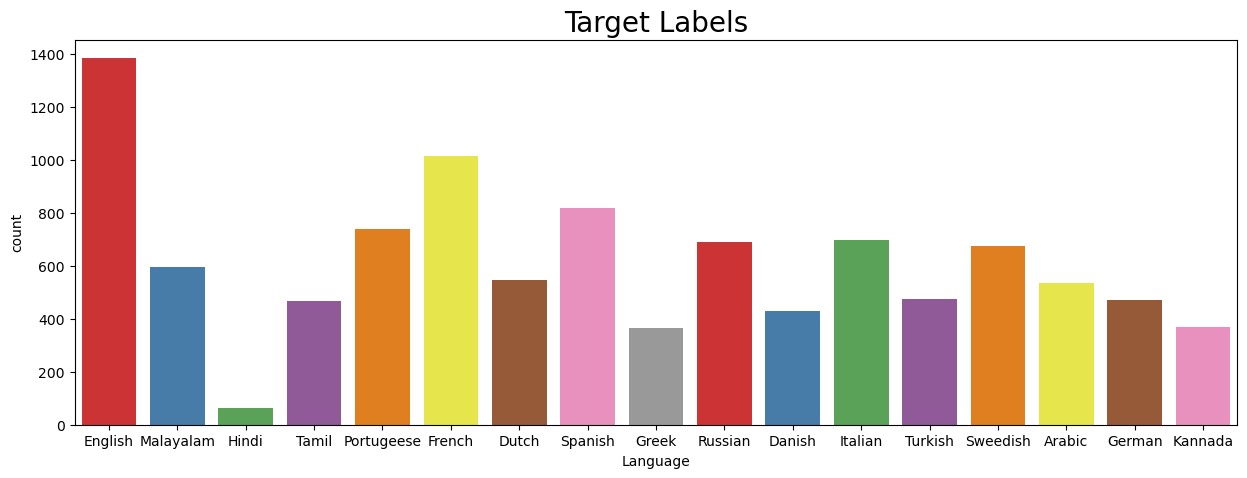

In [6]:
# statistical graphics
import seaborn as sns
#This line of code creates a new figure with a size of 15 inches wide and 5 inches tall using the figure() function from matplotlib.
plt.figure(figsize=(15,5))
#creates a bar plot using the countplot() function from seaborn. 
#the x-axis "Language" || the y-axis "count".
sns.countplot(x='Language',data=data,palette='Set1')
#The x-axis will be labeled with the unique language values.
#the y-axis will be labeled with the count of each language value
plt.title('Target Labels',fontsize=20)

In [7]:
# separating the independent and dependant features
X = data["Text"]
y = data["Language"]

In [8]:
y.shape

(10337,)

In [9]:
X.shape

(10337,)

# <font color='blue'>Text Preprocessing </font>

In [10]:
from string import punctuation
punc=punctuation
print(punc)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [11]:
#removing punctuation
#text_no_punc = []
#for text in X:
#    text = re.sub(r'[!"#$``%&\'»«()*+,-./:;<=>?@\\^_`{|}~]', ' ', text)
#    text = re.sub(r'[[]]', ' ', text)
#    text_no_punc.append(text)

In [12]:
#removing punctuation
def remove_punct(tokens):
    text =""
    punc = punctuation
    punc+='``'
    punc+="''«»؟"
    for w in tokens:
        if w not in punc:
            text+=w
    return text
text_no_punc=X.apply(lambda x:remove_punct(x))

In [13]:
#converting to lower
filtered_text=[]
for text in text_no_punc:
    text = text.lower()
    filtered_text.append(text)
filtered_text[:5]

[' nature in the broadest sense is the natural physical material world or universe',
 'nature can refer to the phenomena of the physical world and also to life in general',
 'the study of nature is a large if not the only part of science',
 'although humans are part of nature human activity is often understood as a separate category from other natural phenomena',
 '1 the word nature is borrowed from the old french nature and is derived from the latin word natura or essential qualities innate disposition and in ancient times literally meant birth']

# <font color='blue'> Count Vecorization </font>

In [14]:
#counts the occurrence of each word in each text sample and returns sparse matrix. 
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer()
X_count = count.fit_transform(filtered_text)

In [15]:
#print the shape and content of the resulting feature matrix.
print(X_count.shape)
print('Sparse Matrix :\n',X_count.toarray())

(10337, 41358)
Sparse Matrix :
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# <font color='blue'> N-Grams Vecorization</font>

In [16]:
#which is used to convert a list of text samples into a matrix of count features with n-grams of size 2.
n_gram=CountVectorizer(ngram_range=(2,2))
X_ngram=n_gram.fit_transform(filtered_text)

In [17]:
#print the shape and content of the result.
print(X_ngram.shape)
print('Sparse Matrix :\n',X_ngram.toarray())

(10337, 130499)
Sparse Matrix :
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# <font color='blue'>  TF-IDF Vecorization</font>

In [18]:
# to convert a list of text samples into a matrix of TF-IDF features.
tfidf=TfidfVectorizer()
X_tfidf=n_gram.fit_transform(filtered_text)

In [19]:
#print the shape and content of the result.
print(X_tfidf.shape)
print('Sparse Matrix :\n',X_tfidf.toarray())

(10337, 130499)
Sparse Matrix :
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# <font color='blue'> Languages encoding</font>

In [20]:
# converting categorical variables to numerical
language_encode={"English":0,
"French":1,
"Spanish":2,
"Portugeese":3,
"Italian":4,
"Russian":5,
"Sweedish":6,
"Malayalam":7,
"Dutch":8,
"Arabic":9,
"Turkish":10,
"German":11,
"Tamil":12,
"Danish":13,
"Kannada":14,
"Greek":15,
"Hindi":16}

Y =y.apply(lambda x : language_encode[x])

In [21]:
#encoding function 
def getcode(n) : 
    for x , y in language_encode.items() : 
        if n == y : 
            return x 

# <font color='blue'>Train Test split</font>

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_count, Y, test_size = 0.10,random_state=24)

# <font color='blue'>Model creation and prediction  </font>

In [23]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score, recall_score, accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [24]:
# training
language_detect_model = MultinomialNB()
language_detect_model.fit(x_train, y_train)

MultinomialNB()

In [25]:
# prediction 
y_pred = language_detect_model.predict(x_test)

# <font color='blue'>Predictions </font>

In [26]:
precision = precision_score(y_test, y_pred,pos_label='positive',average='macro')
recall = recall_score(y_test, y_pred,pos_label='positive',average='macro')
accuracy = accuracy_score(y_test, y_pred)
#print   Precision  Recall  accuracy
print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision, 3), round(recall, 3), round(accuracy, 3)))

Precision: 0.993 / Recall: 0.989 / Accuracy: 0.989


In [27]:
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print (cr)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       148
           1       1.00      1.00      1.00       100
           2       0.99      0.99      0.99        75
           3       1.00      1.00      1.00        74
           4       1.00      1.00      1.00        74
           5       1.00      1.00      1.00        72
           6       1.00      0.96      0.98        84
           7       0.98      1.00      0.99        49
           8       1.00      0.98      0.99        55
           9       1.00      0.98      0.99        58
          10       1.00      0.94      0.97        47
          11       1.00      0.98      0.99        50
          12       1.00      0.97      0.99        40
          13       0.97      1.00      0.99        37
          14       1.00      1.00      1.00        28
          15       1.00      1.00      1.00        32
          16       1.00      1.00      1.00        11

    accuracy              

In [28]:
# visualising the confusion matrix
print (cm)

[[148   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 100   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0  74   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  74   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  74   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  72   0   0   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0  81   0   0   0   0   0   0   1   0   0   0]
 [  0   0   0   0   0   0   0  49   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0  54   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0  57   0   0   0   0   0   0   0]
 [  1   0   1   0   0   0   0   1   0   0  44   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0  49   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0  39   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  37   0   0   0]
 [  0 

# <font color='blue'> Test the model </font>

In [29]:
text ="आप कैसे हैं"
x = count.transform([text])
pred = language_detect_model.predict(x)
print(getcode(pred))

Hindi


In [30]:
text ="السلام عليكم يا اصحابي"
x = count.transform([text])
pred = language_detect_model.predict(x)
print(getcode(pred))

Arabic


In [31]:
text ="également préciser"
x = count.transform([text])
pred = language_detect_model.predict(x)
print(getcode(pred))

French


In [32]:
text ="i am go to school"
x = count.transform([text])
pred = language_detect_model.predict(x)
print(getcode(pred))

English


# <font color='blue'>Test with GUI</font>

In [33]:
pip install tkinter

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tkinter (from versions: none)
ERROR: No matching distribution found for tkinter


TypeError: LanguageDeductionGUI() takes no arguments

In [65]:
import tkinter as tk
from tkinter import filedialog

class LanguageDeductionGUI():
    def __init__(self, root):
        self.root = root
        self.root.title("Language Deduction Tool")

        self.file_path = tk.StringVar()
        self.file_label = tk.Label(self.root, text="Select file:")
        self.file_label.pack(pady=5)
        self.file_entry = tk.Entry(self.root, textvariable=self.file_path)
        self.browse_button = tk.Button(self.root, text="Upload Document", command=self.browse_file)
        self.browse_button.pack(pady=5)

        self.text_label = tk.Label(self.root, text="Enter Quary:")
        self.text_label.pack(pady=5)
        self.text_entry = tk.Entry(self.root)
        self.text_entry.pack(pady=5)

        self.predict_button = tk.Button(self.root, text="Score ", command=self.score)
        self.predict_button.pack(pady=10)
        self.output_label = tk.Label(self.root, text="Score : ")
        self.output_label.pack()
        self.output_text = tk.Text(self.root, width=50, height=5)
        self.output_text.pack()

    def browse_file(self):
        self.file_path.set(filedialog.askopenfilename(title="Select File", filetypes=[("Text files", "*.txt")]))

    def score(self):
        
        predicted_language = "score function" #replase it with function that run with click score button

        # Clear the output text
        self.output_text.delete(1.0, tk.END)

        # the score
        self.output_text.insert(tk.INSERT, predicted_language) #function / var of result from algo

if __name__ == "__main__":
    root = tk.Tk()
    gui = LanguageDeductionGUI(root)
    root.mainloop()


# <font color='blue'> Saving the model</font>

In [ ]:
#Saving Model
with open('X.pickle', 'wb') as handle:
    pickle.dump(X_count,handle)
# save the model to disk
filename = 'model.sav'
pickle.dump(language_detect_model, open(filename, 'wb'))

In [ ]:
# Loading Model
with open('X.pickle', 'rb') as handle:
    data = pickle.load(handle)

with open('model.sav', 'rb') as handle:
    language_detect_model_loaded = pickle.load(handle)